# Breast Cancer Diagnosing Prediction

The objective of this breast cancer diagnosis dataset is to develop a predictive model that can accurately classify tumors as either malignant (cancerous) or benign (non-cancerous) based on ten real-valued features extracted from cell nuclei. 

These features include measurements related to the size, shape, and texture of cell nuclei, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

By analyzing these features and using machine learning or statistical techniques, the goal is to create a model that can assist medical professionals in diagnosing breast tumors.

Early and accurate diagnosis is crucial for effective treatment and improving patient outcomes in cases of breast cancer.

## Attribute Information

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
-3-32.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)


## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("/home/kmmpb/Desktop/data.csv",header=0)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocessing

### 1. Handling Null Values

In [6]:
null_count = df.isnull().sum()

In [7]:
null_count

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            1
compactness_mean           1
concavity_mean             0
concave points_mean        1
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,568.000000,568.000000,569.000000,568.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096357,0.104196,0.088799,0.048872,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014076,0.052746,0.079720,0.038820,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086290,0.064815,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095865,0.092525,0.061540,0.033455,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105325,0.130400,0.130700,0.073730,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
na_count = df.isna().sum()

In [10]:
na_count

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            1
compactness_mean           1
concavity_mean             0
concave points_mean        1
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# Since it is very loc count of null values then remove it
df = df.dropna()

In [12]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
# id no longer needed
df.drop('id',axis = 1,inplace= True)

In [15]:
len(df)

566

In [16]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

### Categorical Encoding

In [17]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Normalization

In [18]:
df_normalized = (df - df.min())/(df.max() - df.min()) * (1)

In [19]:
df_normalized.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Explore Data

In [20]:
df_normalized.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,0.369258,0.337279,0.323231,0.331966,0.216094,0.394647,0.259796,0.207273,0.242154,0.379380,...,0.295388,0.363153,0.281828,0.169835,0.403467,0.218712,0.216156,0.391750,0.262610,0.188853
std,0.483031,0.166527,0.145386,0.167661,0.149003,0.127252,0.161836,0.186959,0.192872,0.138418,...,0.171178,0.163819,0.166545,0.139085,0.150895,0.151208,0.166178,0.224449,0.121579,0.117889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.222987,0.218465,0.216122,0.117253,0.302428,0.138718,0.069119,0.100944,0.282449,...,0.180719,0.241071,0.167725,0.080890,0.300007,0.115464,0.091394,0.221065,0.184802,0.106766
50%,0.000000,0.300014,0.308252,0.292654,0.170880,0.390313,0.223821,0.142233,0.165880,0.369697,...,0.249377,0.355810,0.235121,0.122727,0.396751,0.178964,0.180671,0.341667,0.247487,0.163813
75%,1.000000,0.416087,0.407677,0.414519,0.270923,0.475490,0.340455,0.297739,0.361382,0.452904,...,0.383404,0.465818,0.371856,0.216231,0.493495,0.299949,0.303155,0.553952,0.317514,0.242769
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


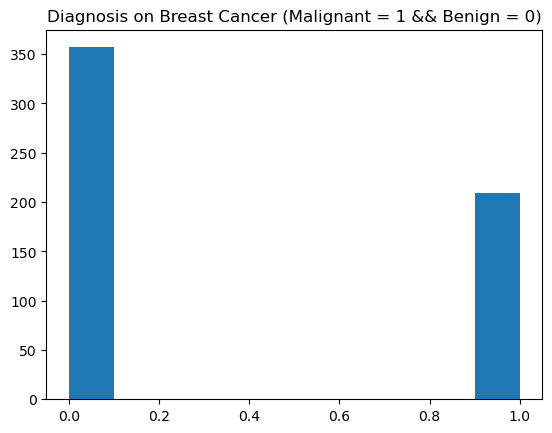

In [21]:
plt.hist(df['diagnosis'])
plt.title("Diagnosis on Breast Cancer (Malignant = 1 && Benign = 0)")
plt.show()

From here, we observed that the distribution of Patients who were got positive of malignant, and Benign

### Correlation

In [22]:
df= df_normalized

In [23]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.728995,0.411745,0.741517,0.708106,0.358901,0.594883,0.695194,0.775443,0.330828,...,0.775749,0.453402,0.782053,0.733505,0.418338,0.587915,0.656331,0.792199,0.413067,0.319542
radius_mean,0.728995,1.000000,0.319789,0.997848,0.987279,0.171254,0.506492,0.675999,0.822676,0.150428,...,0.969649,0.294114,0.965354,0.941353,0.115667,0.411787,0.523808,0.745569,0.162436,0.003721
texture_mean,0.411745,0.319789,1.000000,0.325475,0.317228,-0.023738,0.233082,0.299515,0.290728,0.070882,...,0.348342,0.912604,0.353806,0.339538,0.073687,0.271482,0.296016,0.291545,0.100429,0.114060
perimeter_mean,0.741517,0.997848,0.325475,1.000000,0.986469,0.208019,0.557362,0.715482,0.851179,0.185609,...,0.969623,0.300004,0.970682,0.941940,0.146673,0.454269,0.560924,0.772637,0.187404,0.047688
area_mean,0.708106,0.987279,0.317228,0.986469,1.000000,0.177924,0.499420,0.685526,0.823709,0.154656,...,0.962721,0.284812,0.959239,0.959518,0.119744,0.389199,0.509683,0.723595,0.142583,0.001162
smoothness_mean,0.358901,0.171254,-0.023738,0.208019,0.177924,1.000000,0.660383,0.522426,0.554117,0.558056,...,0.214318,0.034828,0.240117,0.208402,0.806197,0.476102,0.436070,0.504930,0.394644,0.501108
compactness_mean,0.594883,0.506492,0.233082,0.557362,0.499420,0.660383,1.000000,0.883812,0.831980,0.601749,...,0.536676,0.244387,0.591966,0.512222,0.564402,0.866355,0.816265,0.817200,0.506025,0.684750
concavity_mean,0.695194,0.675999,0.299515,0.715482,0.685526,0.522426,0.883812,1.000000,0.921389,0.501912,...,0.688151,0.297137,0.729853,0.676685,0.446905,0.757376,0.884319,0.863585,0.408017,0.514676
concave points_mean,0.775443,0.822676,0.290728,0.851179,0.823709,0.554117,0.831980,0.921389,1.000000,0.463758,...,0.830999,0.289246,0.856737,0.811069,0.450455,0.668600,0.751293,0.911298,0.373837,0.367039
symmetry_mean,0.330828,0.150428,0.070882,0.185609,0.154656,0.558056,0.601749,0.501912,0.463758,1.000000,...,0.189753,0.088687,0.223254,0.182709,0.427219,0.472760,0.434928,0.431239,0.698957,0.435051


In [24]:
plt.figure(figsize=(16,8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

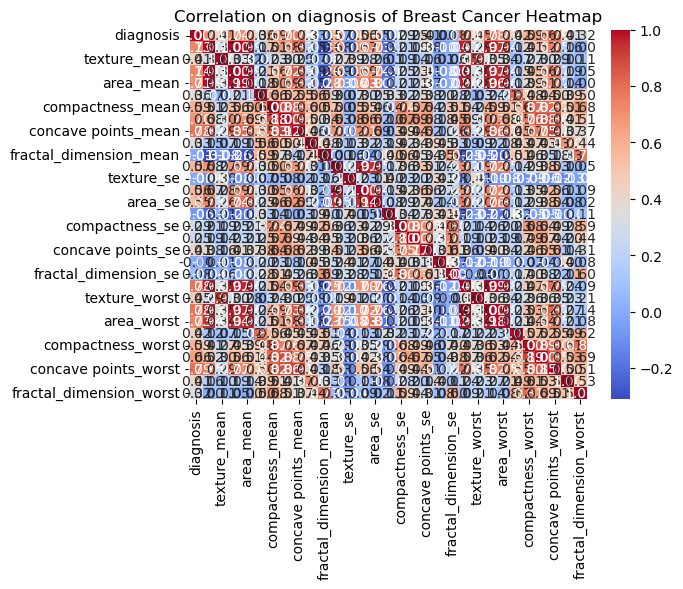

In [25]:
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation on diagnosis of Breast Cancer Heatmap')
plt.show()

## Nucleus Features

In [26]:
features_mean = list(df.columns[1:11])

In [27]:
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [28]:
# Split the Dataframe on Diagnosis

dfM = df[df['diagnosis']==1]
dfB = df[df['diagnosis']==0]

In [29]:
# Histogram Visualization

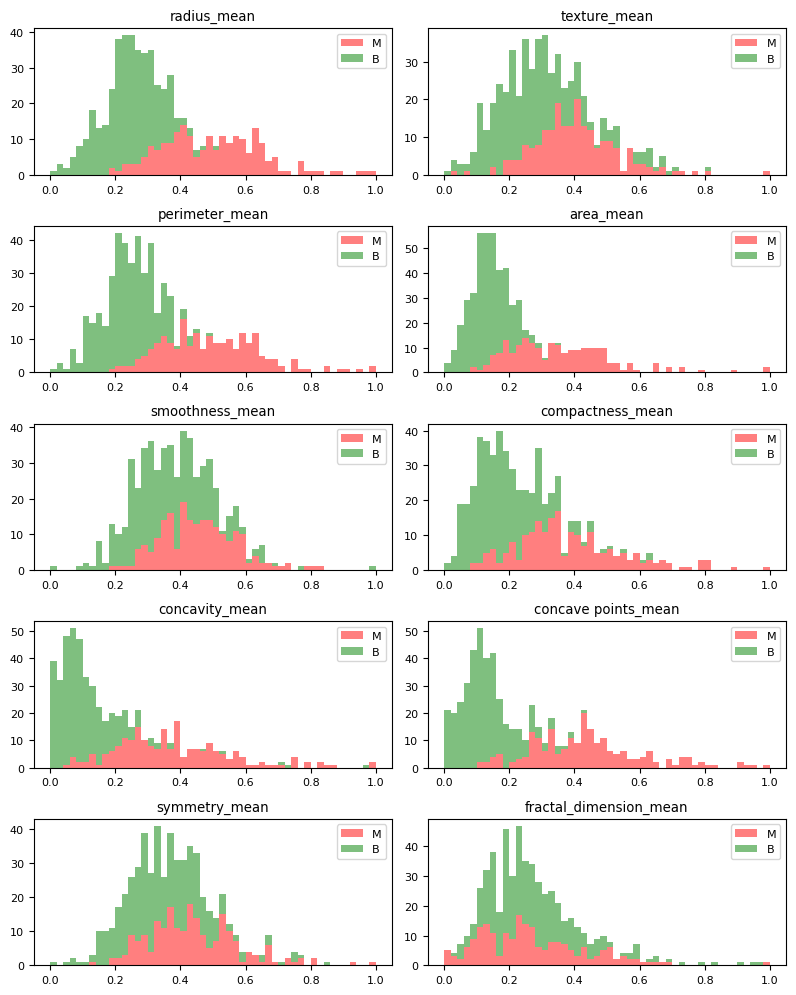

In [30]:
plt.rcParams.update({'font.size':8})
fig, axes = plt.subplots(nrows =5, ncols =2, figsize =(8,10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = ( max( df[features_mean[idx]]) - min( df[features_mean[idx]])) / 50
    ax.hist( 
            [ dfM[features_mean[idx]],     dfB[features_mean[idx]] ] ,
            bins = np.arange( 
                min(df[features_mean[idx]]), 
                max(df[features_mean[idx]]) + binwidth, 
                binwidth), 
            alpha = 0.5, 
            stacked = True, 
            label = ['M', 'B'],
            color = ['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])


plt.tight_layout()
plt.show()

From the distribution,
We find that the mean which is lead to deciding factor of Cancer is at most :
1. Texture mean
2. Smooth mean
3. Symmetry mean
which leads to high deciding factor

## Model Building

In [31]:
import matplotlib.gridspec as grid
import mpld3 as mpl

In [32]:
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import metrics

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Creating Training and Test Data

In [36]:
traindf, testdf = train_test_split(df, test_size = 0.3)

#### As we cut off the dataset into 70:30 ratio

## Model Classifier

In [98]:
def ClassificationModel (model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])                       # Fit the Model
    predictions = model.predict(data[predictors])                   # Make Prediction on training set
    accuracy = metrics.accuracy_score(predictions, data[outcome])   # Print Accuracy
    print("Accuracy: %s" % " {0:.3%}".format(accuracy))

    kf = KFold(n_splits=5, shuffle=True, random_state=42)           # Perform Kfold where fold =5
    scores = cross_val_score(model, X = data[predictors], y =data[outcome], cv=kf, scoring='accuracy')
    # error = []
    # for train, test in scores:
    #     train_predictors = (data[predictors].iloc[train,:])         # Filter training data
    #     train_target = data[outcome].iloc[train]                    # training using target
    #     model.fit(train_predictors, train_target)                   # training using the predictors and target
    #     error.append(model.score(data[predictors].iloc[test,:], 
    #                              data[outcome].iloc[test]))         # Recording error from each cross validation run
    #     print("Crosss - Validation Score : %s" % 
    #           "{0:.3%}".format(np.mean(error)))
    #     model.fit(data[predictors],data[outcome])
    scores *=100
    for x in scores:
        print("Cross-Validation Scores:", x)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation:", scores.std())
        # Create Confusion Matrix
    cm = metrics.confusion_matrix( data[outcome], predictions )

    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Oranges', cbar = False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return model

In [65]:
predictor_var = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean']
outcome_var = 'diagnosis'

## Logistic Regression Model

Accuracy:  91.919%
Cross-Validation Scores: 93.75
Cross-Validation Scores: 92.40506329113924
Cross-Validation Scores: 92.40506329113924
Cross-Validation Scores: 86.07594936708861
Cross-Validation Scores: 93.67088607594937
Mean Accuracy: 91.6613924050633
Standard Deviation: 2.8531951634268657


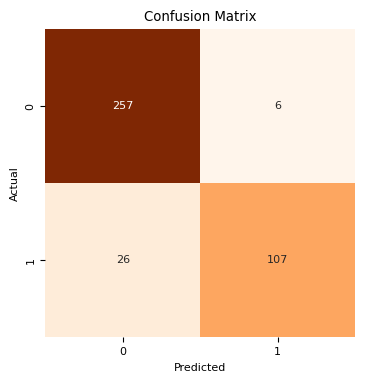

In [81]:
model = LogisticRegression()
ClassificationModel(model, traindf, predictor_var, outcome_var)

## Decision Tree Model

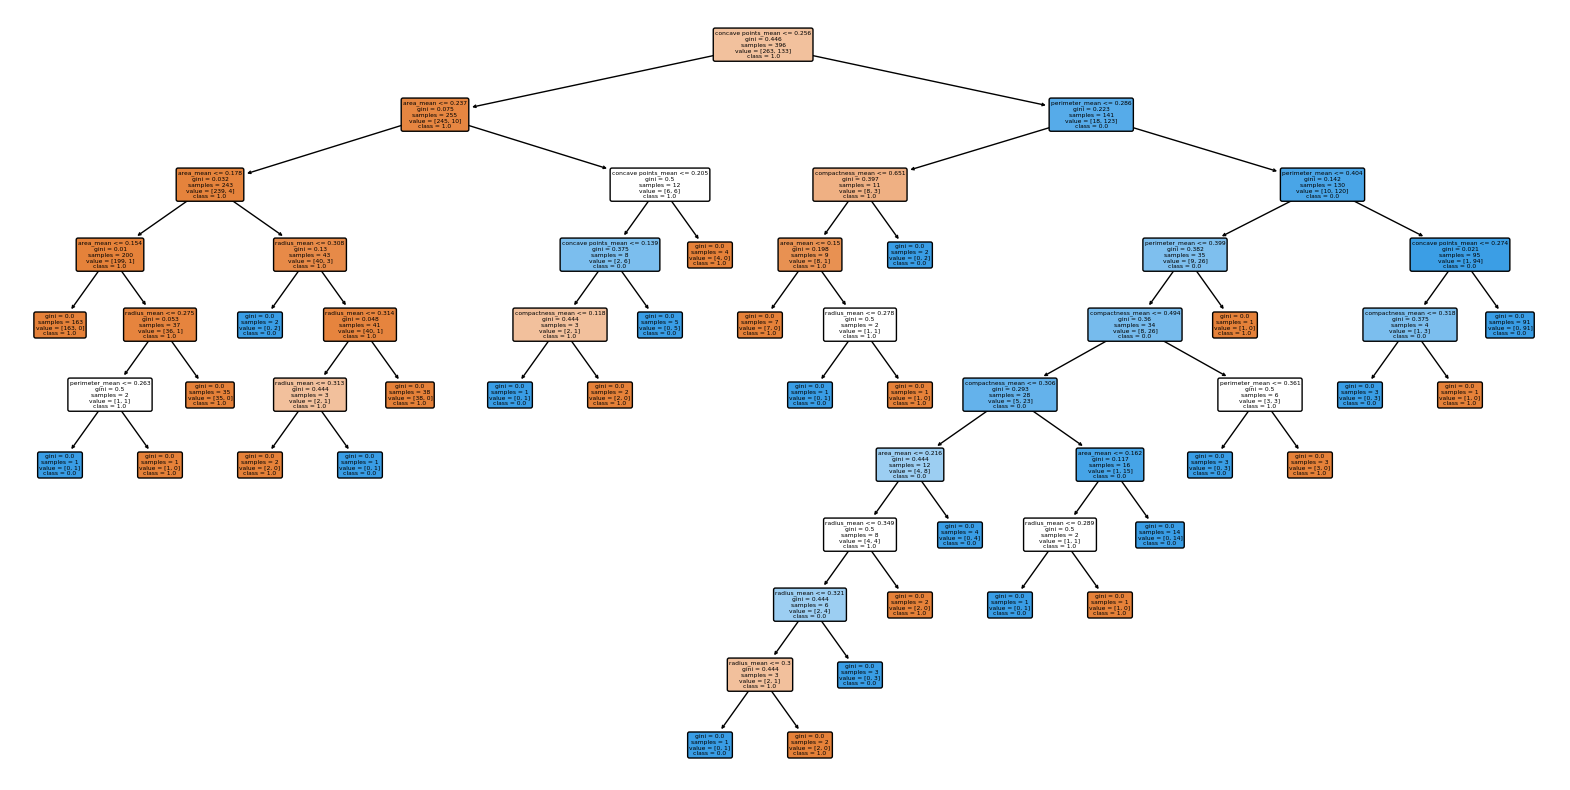

Accuracy:  100.000%
Cross-Validation Scores: 91.25
Cross-Validation Scores: 92.40506329113924
Cross-Validation Scores: 94.9367088607595
Cross-Validation Scores: 84.81012658227847
Cross-Validation Scores: 91.13924050632912
Mean Accuracy: 90.90822784810128
Standard Deviation: 3.3414424942885708


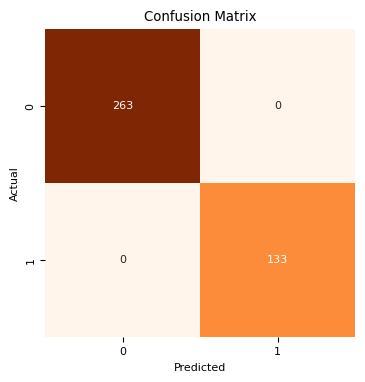

In [86]:
model = DecisionTreeClassifier()
model.fit(traindf[predictor_var], traindf[outcome_var])

# Plot the decision tree
plt.figure(figsize=(20, 10))  # You can adjust the figsize as needed
plot_tree(model, filled=True, feature_names=predictor_var, class_names=[str(x) for x in df[outcome_var].unique()], rounded=True)
plt.show()
ClassificationModel(model,traindf,predictor_var, outcome_var)

## Random Forest

In [87]:
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [88]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators = 100 , min_samples_split = 25 , max_depth = 7,max_features= 2)

Accuracy:  96.970%
Cross-Validation Scores: 93.75
Cross-Validation Scores: 93.67088607594937
Cross-Validation Scores: 93.67088607594937
Cross-Validation Scores: 91.13924050632912
Cross-Validation Scores: 96.20253164556962
Mean Accuracy: 93.6867088607595
Standard Deviation: 1.601465940364556


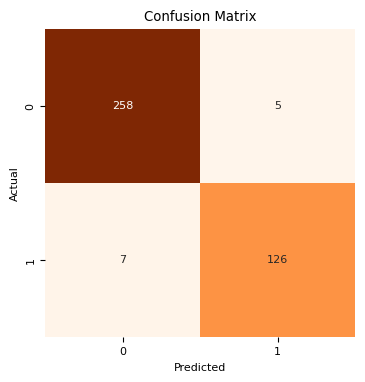

In [89]:
ClassificationModel(model,traindf, predictor_var, outcome_var)

### Extracting Feature Importance

In [90]:
featimp = pd.Series(model.feature_importances_, index= predictor_var).sort_values(ascending= False)
print(featimp)

concave points_mean       0.333715
area_mean                 0.150651
perimeter_mean            0.137359
concavity_mean            0.133430
radius_mean               0.098058
compactness_mean          0.058882
texture_mean              0.048348
smoothness_mean           0.016297
symmetry_mean             0.013689
fractal_dimension_mean    0.009570
dtype: float64


##### Using top 5 features

In [93]:
predictor_var = ['concave points_mean','area_mean','perimeter_mean','concavity_mean','radius_mean']

Accuracy:  95.707%
Cross-Validation Scores: 92.5
Cross-Validation Scores: 93.67088607594937
Cross-Validation Scores: 93.67088607594937
Cross-Validation Scores: 89.87341772151899
Cross-Validation Scores: 94.9367088607595
Mean Accuracy: 92.93037974683544
Standard Deviation: 1.7118585987754857


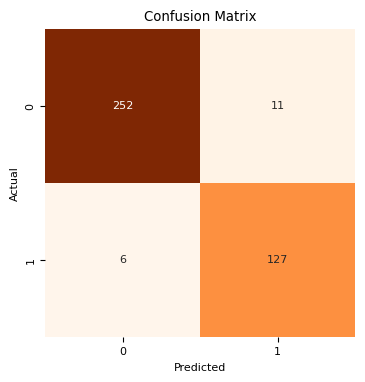

In [94]:
model = RandomForestClassifier(n_estimators = 100 , min_samples_split = 25 , max_depth = 7,max_features= 2)
ClassificationModel(model,traindf, predictor_var, outcome_var)

### Best Model On training

##### From the Observation, Random Forest Classifier on Feature importance is got higher evaluation metrics

### Test the Model

Accuracy:  95.294%
Cross-Validation Scores: 88.23529411764706
Cross-Validation Scores: 91.17647058823529
Cross-Validation Scores: 88.23529411764706
Cross-Validation Scores: 91.17647058823529
Cross-Validation Scores: 100.0
Mean Accuracy: 91.76470588235294
Standard Deviation: 4.322628957852667


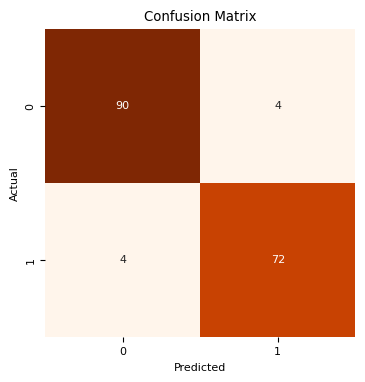

RandomForestClassifier(max_depth=7, max_features=2, min_samples_split=25)

In [109]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators = 100 , min_samples_split = 25 , max_depth = 7,max_features= 2)
ClassificationModel(model,testdf, predictor_var, outcome_var)

### Using Feature Importance

Accuracy:  93.529%
Cross-Validation Scores: 85.29411764705883
Cross-Validation Scores: 88.23529411764706
Cross-Validation Scores: 79.41176470588235
Cross-Validation Scores: 94.11764705882352
Cross-Validation Scores: 100.0
Mean Accuracy: 89.41176470588235
Standard Deviation: 7.107674102114455


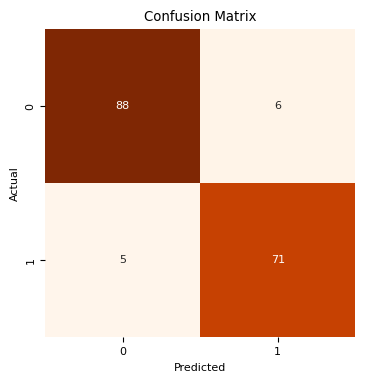

In [99]:
predictor_var = ['concave points_mean','area_mean','perimeter_mean','concavity_mean','radius_mean']
model = RandomForestClassifier(n_estimators = 100 , min_samples_split = 25 , max_depth = 7,max_features= 2)
model = ClassificationModel(model,testdf, predictor_var, outcome_var)

# Conclusion:

The best model to be used for diagnosing breast Cancer is Random Forest Classifier Using Top Feature Importance :
   
    concave points_mean'
    
    area_mean'
   
    perimeter_mean'
    
    concavity_mean'
    
    radius_mean'

got an accuracy of ~~95% and a cross validation for the test data set.  

## Save Model

In [97]:
import pickle

In [100]:
import pickle

# Save the model to a file
file_path = 'BreastCancerModel.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)


## Open the saved Model

In [101]:
# Load the model from the pickle file
with open('BreastCancerModel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model for predictions


In [102]:
model = loaded_model

In [111]:
predictions = model.predict(testdf[predictor_var])                   # Make Prediction on training set
accuracy = metrics.accuracy_score(predictions, testdf[outcome_var]) 

In [113]:
print(accuracy*100)

95.29411764705881
